In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Projects\Airlines_Fare_Predictor\Airlines_Cleaned_File.csv')
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.shape

(297940, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297940 entries, 0 to 297939
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297940 non-null  object 
 1   source_city       297940 non-null  object 
 2   departure_time    297940 non-null  object 
 3   stops             297940 non-null  object 
 4   arrival_time      297940 non-null  object 
 5   destination_city  297940 non-null  object 
 6   class             297940 non-null  object 
 7   duration          297940 non-null  float64
 8   days_left         297940 non-null  int64  
 9   price             297940 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.7+ MB


Data is fully pre-processed so I perform next step which is 'feature encoding'.

# Outlier Detection: Box Plot

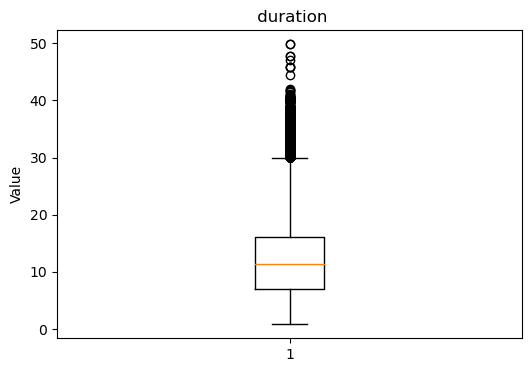

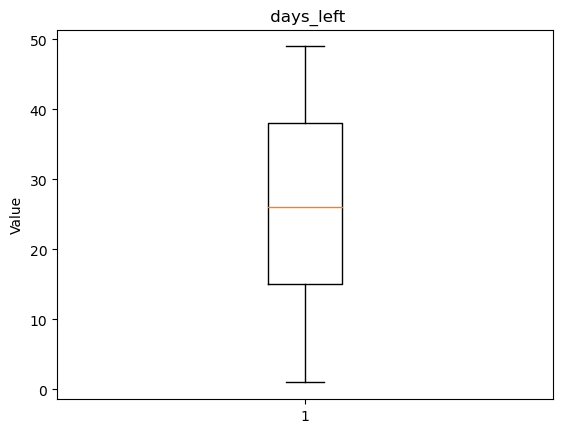

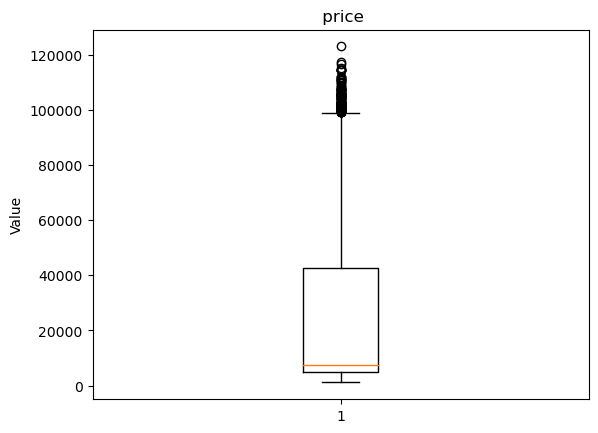

In [5]:
plt.figure(figsize=(6,4))

for column in df.select_dtypes(include='number'):
    plt.boxplot(df[column])
    plt.title(f' {column}')
    plt.ylabel('Value')
    plt.show()

Duration and Price columns have Outliers. Price is the target variable so, we can not treat outliers of price.

# Feature Encoding

In [6]:
#checking unique values of all columns
for column in df.columns:
    unique_values = df[column].unique()
    
    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print()

Column: airline
Unique Values:
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

Column: source_city
Unique Values:
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

Column: departure_time
Unique Values:
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']

Column: stops
Unique Values:
['zero' 'one' 'two_or_more']

Column: arrival_time
Unique Values:
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']

Column: destination_city
Unique Values:
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

Column: class
Unique Values:
['Economy' 'Business']

Column: duration
Unique Values:
[ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.42  7.67  8.33 10.42 23.75 19.5   6.5  12.42 21.08 28.17 28.25  9.25
 17.92  7.08 13.83  7.58 15.83 24.42  4.17  4.

All the variables are nomial and contains less category that why I decide to perfrom one hot encoding.

In [7]:
#using get_dummies method

d1 = pd.get_dummies(df['airline'], drop_first = True,prefix='airline')

d2 = pd.get_dummies(df['source_city'], drop_first = True,prefix='source_city')

d3 = pd.get_dummies(df["departure_time"], drop_first=True,prefix='departure_time')

d4 = pd.get_dummies(df["stops"],drop_first=True,prefix='stops')

d5 = pd.get_dummies(df["arrival_time"],drop_first=True,prefix='arrival_time')

d6 = pd.get_dummies(df["destination_city"],drop_first=True,prefix='destination_city')

d7 = pd.get_dummies(df["class"],drop_first=True,prefix='class')

In [8]:
df = pd.concat([df,d1,d2,d3,d4,d5,d6,d7],axis=1)

In [9]:
df = df.drop(columns=['airline','source_city','departure_time','stops','arrival_time','destination_city','class'])
df.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2.17,1,5953,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
1,2.33,1,5953,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1
2,2.17,1,5956,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1
3,2.25,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,2.33,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1


In [10]:
df.columns.tolist()

['duration',
 'days_left',
 'price',
 'airline_Air_India',
 'airline_GO_FIRST',
 'airline_Indigo',
 'airline_SpiceJet',
 'airline_Vistara',
 'source_city_Chennai',
 'source_city_Delhi',
 'source_city_Hyderabad',
 'source_city_Kolkata',
 'source_city_Mumbai',
 'departure_time_Early_Morning',
 'departure_time_Evening',
 'departure_time_Late_Night',
 'departure_time_Morning',
 'departure_time_Night',
 'stops_two_or_more',
 'stops_zero',
 'arrival_time_Early_Morning',
 'arrival_time_Evening',
 'arrival_time_Late_Night',
 'arrival_time_Morning',
 'arrival_time_Night',
 'destination_city_Chennai',
 'destination_city_Delhi',
 'destination_city_Hyderabad',
 'destination_city_Kolkata',
 'destination_city_Mumbai',
 'class_Economy']

In [11]:
#check data types of all variables to confrim that all variables are in 'int' or 'float' 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297940 entries, 0 to 297939
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      297940 non-null  float64
 1   days_left                     297940 non-null  int64  
 2   price                         297940 non-null  int64  
 3   airline_Air_India             297940 non-null  uint8  
 4   airline_GO_FIRST              297940 non-null  uint8  
 5   airline_Indigo                297940 non-null  uint8  
 6   airline_SpiceJet              297940 non-null  uint8  
 7   airline_Vistara               297940 non-null  uint8  
 8   source_city_Chennai           297940 non-null  uint8  
 9   source_city_Delhi             297940 non-null  uint8  
 10  source_city_Hyderabad         297940 non-null  uint8  
 11  source_city_Kolkata           297940 non-null  uint8  
 12  source_city_Mumbai            297940 non-nul

After encoding ll variables has correct data types.

# Checking Distribution and Skewness of Data

In [12]:
df.shape

(297940, 31)

In [13]:
# Select appropriate bin size using sturges_rule

import math

def sturges_rule(num_data_points):
    k = 1 + math.log2(num_data_points)
    return int(k)

# Example usage
num_data_points = 297940
bins = sturges_rule(num_data_points)
print("Number of bins according to Sturges' Rule:", bins)

Number of bins according to Sturges' Rule: 19


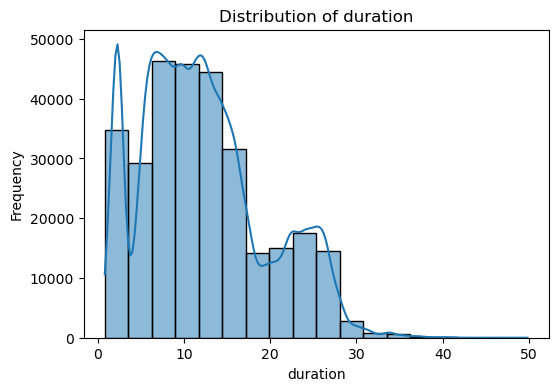

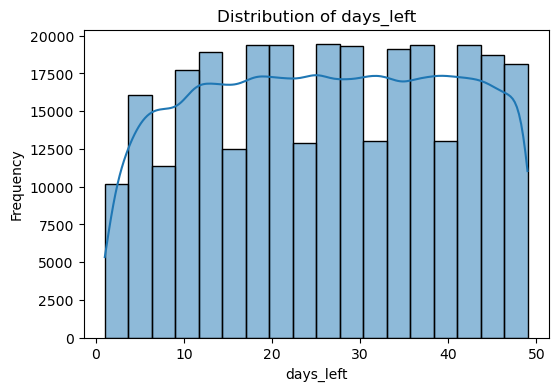

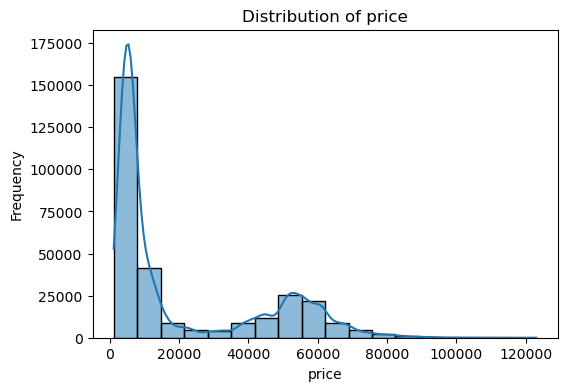

In [14]:
# check distribution of all continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables from the list
binary_vars = [var for var in continuous_vars if df[var].nunique() == 2]

# Exclude binary variables from the continuous variables
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Plot the distribution of each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, bins=18, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

In [15]:
# check skewness of all continuous variables
df[continuous_vars].skew()

duration     0.600607
days_left   -0.036513
price        1.053949
dtype: float64

**'days_left' is not skewed and 'duration' is moderate skewed and 'price' is dependent variable. Therefore, transformation is not needed.**

# Check colinearity between variables to avoid model from overfitting.

In [16]:
df.corr()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
duration,1.000000,-0.039839,0.201035,0.274043,-0.140172,-0.366443,0.017228,0.132746,0.032045,-0.046248,0.000368,0.059117,-0.023508,-0.046559,0.106964,-0.045685,-0.073847,0.116581,0.091334,-0.507814,0.010325,0.030885,-0.107515,0.126466,-0.063251,0.061549,-0.114370,0.064857,0.060504,-0.044287,-0.136665
days_left,-0.039839,1.000000,-0.092302,-0.022867,0.030650,0.005908,-0.017442,-0.007635,0.002834,-0.000962,0.010921,0.000408,-0.009586,0.004049,-0.010003,0.011744,-0.003616,0.003682,-0.018681,0.000017,0.021164,-0.014226,0.026655,-0.003738,-0.004375,0.001130,0.006493,-0.000144,-0.004156,-0.004281,0.013349
price,0.201035,-0.092302,1.000000,0.067971,-0.194655,-0.280275,-0.112216,0.360780,0.018701,-0.042051,-0.013657,0.015227,0.013266,-0.011808,0.008018,-0.033997,0.017042,0.042505,-0.065214,-0.183583,-0.060703,0.055912,-0.093476,0.031198,0.020780,0.018490,-0.052295,-0.008663,0.020148,0.011174,-0.938046
airline_Air_India,0.274043,-0.022867,0.067971,1.000000,-0.176469,-0.248891,-0.105467,-0.526023,-0.012261,0.011806,0.000792,-0.003206,0.037290,0.034122,0.020820,-0.007146,-0.025968,0.010833,-0.004698,-0.068907,-0.025874,-0.041499,-0.059869,0.068305,-0.001356,0.005603,-0.016447,0.009981,-0.006380,0.042546,-0.123744
airline_GO_FIRST,-0.140172,0.030650,-0.194655,-0.176469,1.000000,-0.117869,-0.049947,-0.249113,-0.063064,0.029648,-0.023273,0.000823,0.027018,0.028602,-0.002264,0.008694,-0.041476,-0.024579,-0.037767,0.016286,0.086688,-0.045302,0.101922,-0.065090,0.001332,-0.059168,0.034735,-0.025395,-0.000229,0.024052,0.195005
airline_Indigo,-0.366443,0.005908,-0.280275,-0.248891,-0.117869,1.000000,-0.070445,-0.351348,0.032109,-0.012109,0.009415,0.016642,-0.028197,-0.032268,-0.021009,0.078654,0.028989,-0.073767,-0.053756,0.175686,0.014659,0.007954,0.063728,-0.083846,-0.009776,0.018145,-0.003210,-0.001302,0.034349,-0.030104,0.275034
airline_SpiceJet,0.017228,-0.017442,-0.112216,-0.105467,-0.049947,-0.070445,1.000000,-0.148883,0.003427,0.031085,-0.050786,0.031919,-0.004484,0.032220,0.000899,-0.011446,-0.025092,0.003810,-0.037325,0.069954,0.018704,-0.039450,0.001000,0.031202,0.012071,-0.005832,0.041324,-0.050290,0.030811,-0.000463,0.116545
airline_Vistara,0.132746,-0.007635,0.360780,-0.526023,-0.249113,-0.351348,-0.148883,1.000000,0.032758,-0.047750,0.029203,-0.026605,-0.007362,-0.036387,-0.006164,-0.057090,0.056994,0.044373,0.024887,-0.106352,-0.058118,0.091626,-0.134472,0.029914,0.024508,0.028845,-0.039195,0.036906,-0.031341,-0.016232,-0.301206
source_city_Chennai,0.032045,0.002834,0.018701,-0.012261,-0.063064,0.032109,0.003427,0.032758,1.000000,-0.194530,-0.153283,-0.165161,-0.194264,0.017722,-0.072163,-0.014610,0.032320,0.036279,-0.000804,-0.024336,-0.017448,0.016676,0.009086,-0.022783,0.003544,-0.151976,0.060608,0.015174,0.016186,0.043714,-0.010419
source_city_Delhi,-0.046248,-0.000962,-0.042051,0.011806,0.029648,-0.012109,0.031085,-0.047750,-0.194530,1.000000,-0.200816,-0.216378,-0.254505,-0.028610,0.069713,0.011709,-0.016365,-0.061925,0.009211,0.062977,0.080165,-0.026407,-0.028454,0.002037,-0.007181,0.061665,-0.244875,0.015133,0.041643,0.064528,0.013586


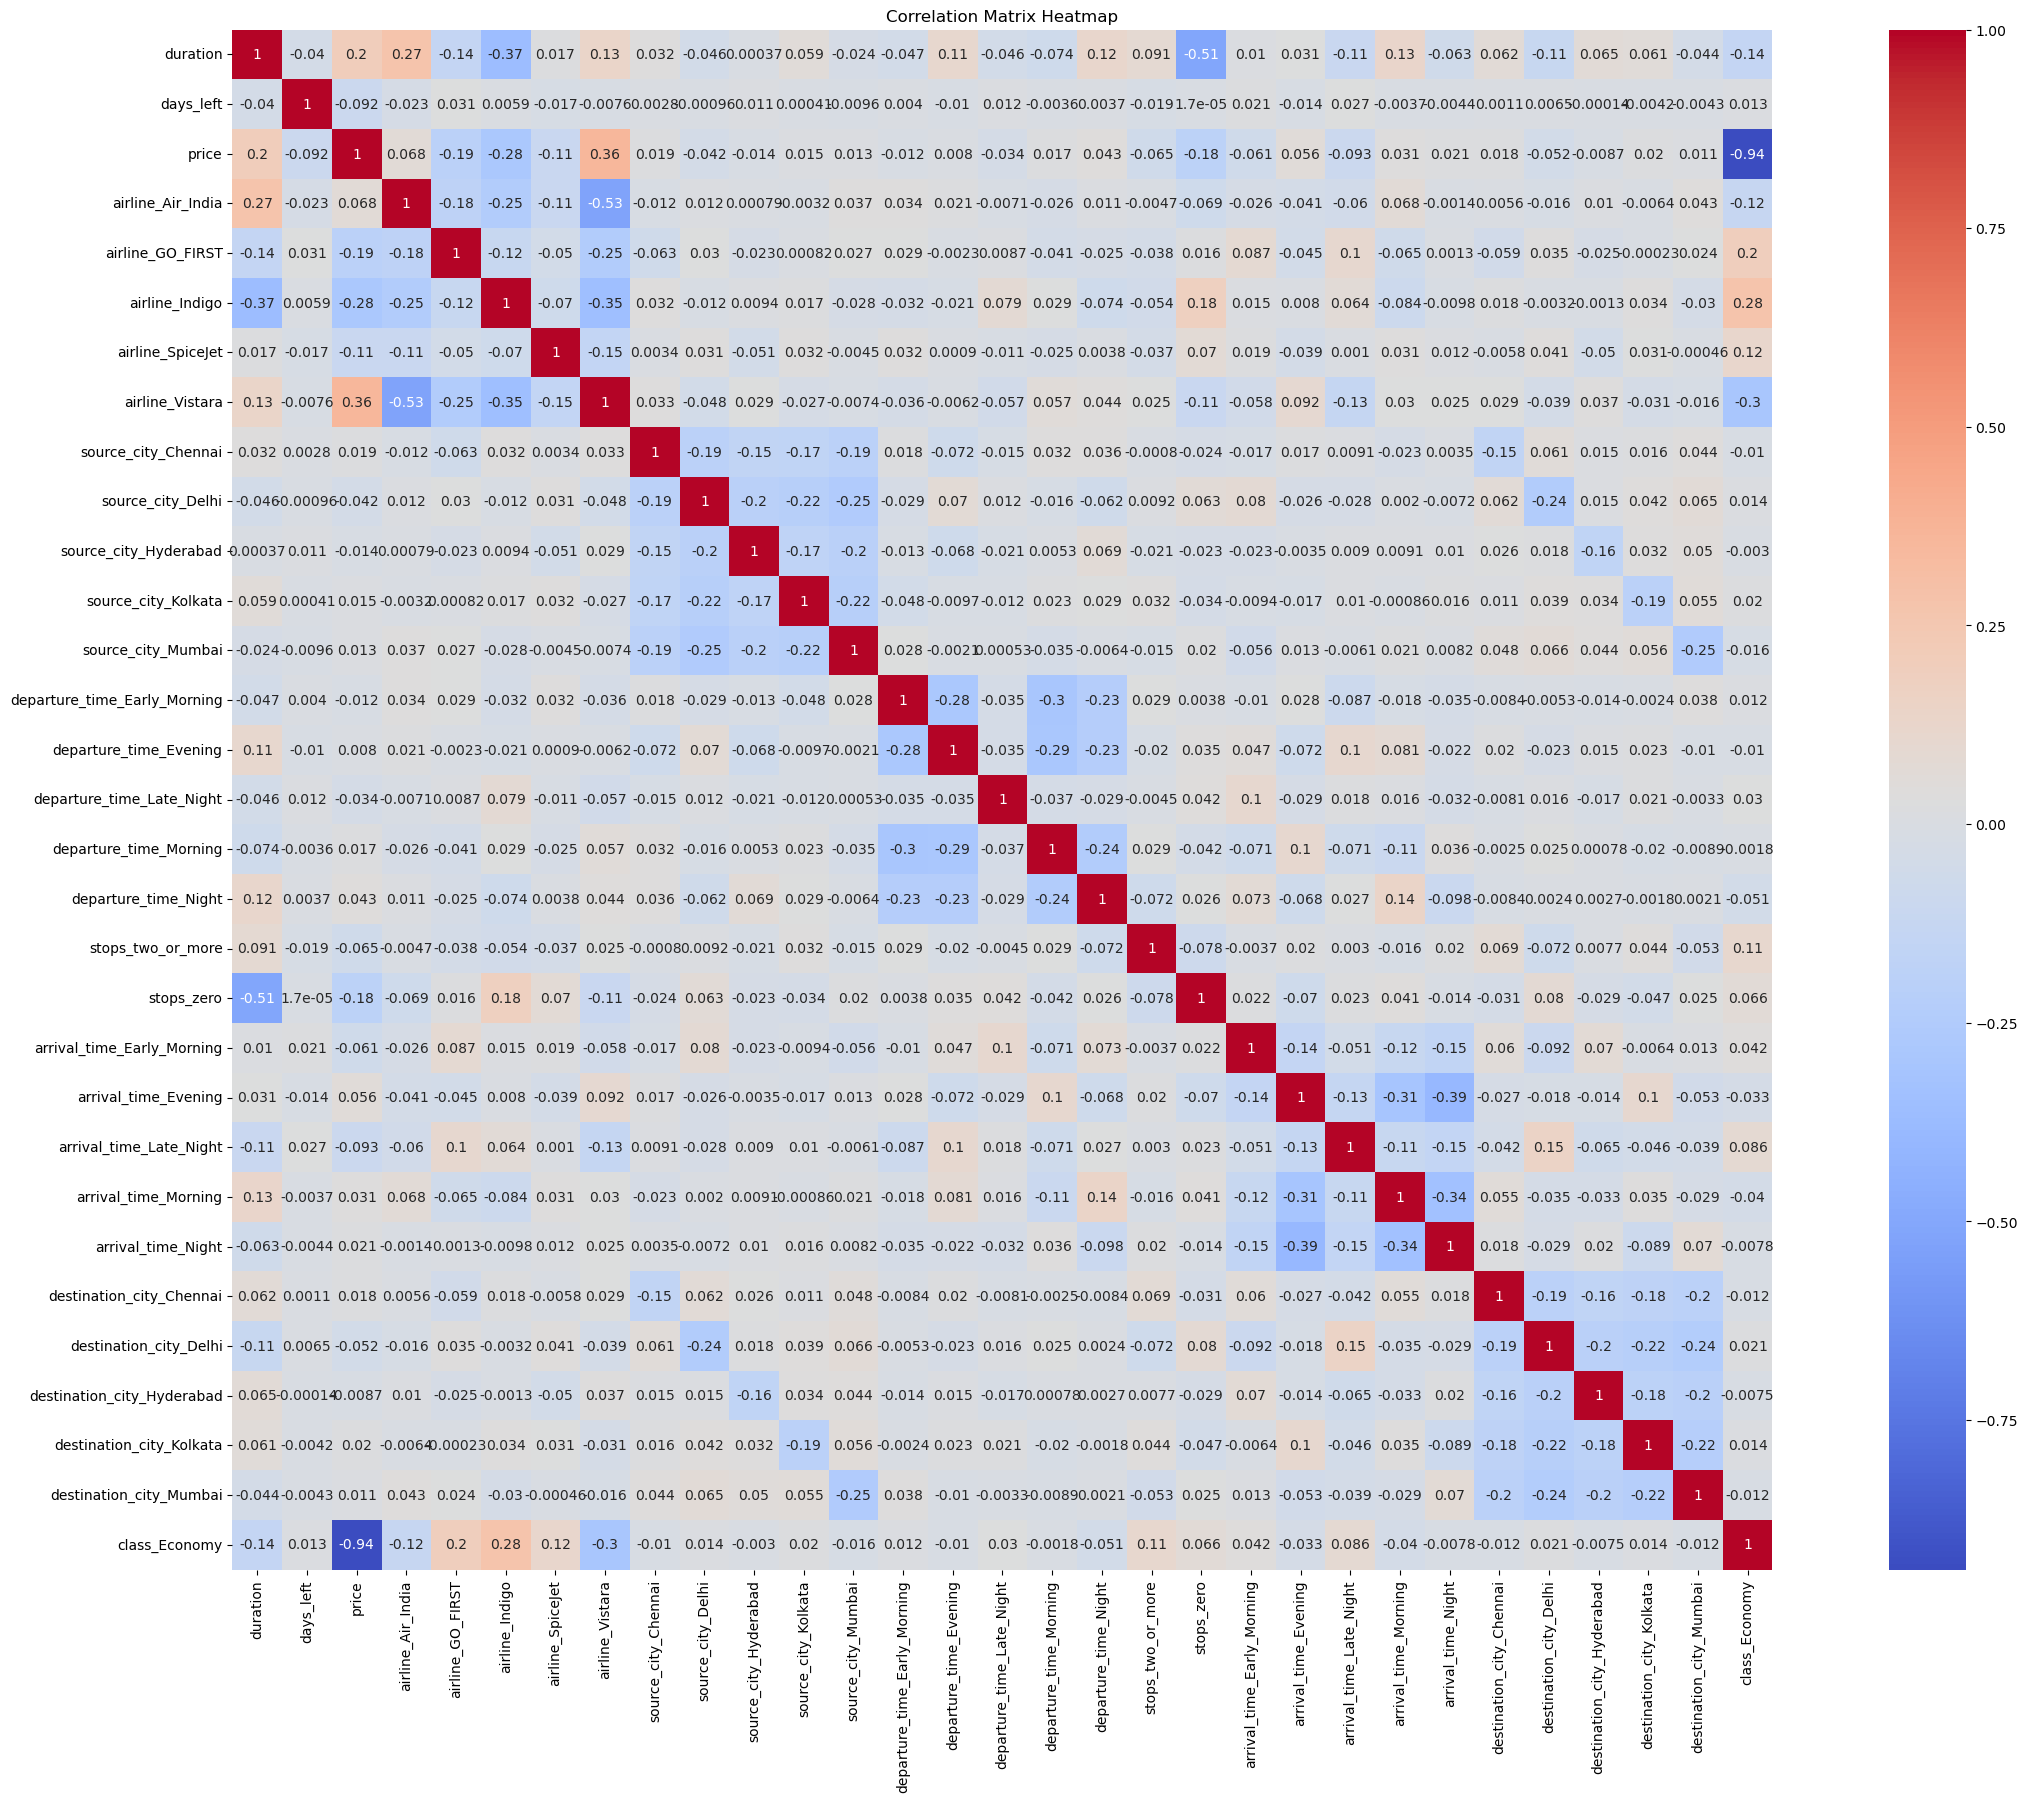

In [17]:
corr_matrix =df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Find columns with correlation greater than 0.9 or less than -0.9
highly_correlated_cols = set()  # Use a set to avoid duplicates
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            correlation = corr_matrix.loc[col1, col2]
            if abs(correlation) >= 0.9:
                pair = tuple(sorted([col1, col2]))  # Sort columns to avoid duplicates
                highly_correlated_cols.add((pair, correlation))

# Display highly correlated columns with their correlation values
for i, ((col1, col2), correlation) in enumerate(highly_correlated_cols, start=1):
    print(f"{i}) Columns: {col1} and {col2} are highly correlated with a correlation of {correlation}")
    print("-" * 100)

1) Columns: class_Economy and price are highly correlated with a correlation of -0.938046283891875
----------------------------------------------------------------------------------------------------


**"class_Economy" and "price" are highly correlated. This shows that class_Economy is the most important feature.**

**We can not drop one of them because "price" is the target variable.**

# Diving data into train and test set

In [19]:
x = df.drop("price",axis=1)
y = df['price']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [21]:
X_train.shape, X_test.shape

((208558, 30), (89382, 30))

In [22]:
y_train.shape, y_test.shape

((208558,), (89382,))

# Feature Scaling

In [23]:
for column in X_train.columns:
    unique_values = X_train[column].unique()

    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print()

Column: duration
Unique Values:
[ 8.08  6.08  3.75 16.5   2.42  8.17 19.75 16.42 13.75 14.5  11.92 25.08
 15.83  4.25 22.25  2.25  9.   23.92 32.58 18.92  2.58  8.5   6.5  24.67
  6.58 15.67  4.33  5.75 10.33 10.    4.42 19.5   9.58 21.83 23.08 15.08
 23.58  7.5   6.83 24.83 22.42 14.17 24.25  8.25 22.5  16.    9.08 24.5
  8.58 24.33 10.17 17.    3.08 16.17 10.5   6.92  7.33 12.75  9.25 12.5
  2.83  1.   20.75 15.17  8.83 22.17 12.08 13.5   7.83  5.08  2.    5.
  1.58  4.67 13.58  8.75 15.92 16.58 24.92 14.83 18.67 12.    9.75  5.92
  1.92  2.17 20.67 10.67 13.25 11.58 14.42  5.33 11.42 23.5   7.92 10.92
 11.67 13.08 16.67 16.83 12.83 24.17 12.58  4.75  2.67 28.   17.17 13.17
  9.67 22.33 17.42 19.58 26.    8.92 23.83  1.67  9.17  7.08 15.58 19.83
 11.75 30.5  17.83  9.5  22.67 19.33 26.25 13.33 14.    6.25  7.17 31.33
 23.33 23.   14.67  2.75 16.08 12.67 11.17 25.   27.    1.33  2.33 12.25
  8.33 12.17 24.42 20.5   1.17 17.25  6.17  1.83  7.75 29.   10.08 26.42
 10.83 15.   13.   14.5

Only 2 variables needs scaling: 'duration', 'days_left'. I decide to apply min_max scaler because data has a bounded range and most of data is in 0-1 range.

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

columns_to_scale = ['duration', 'days_left']

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

X_train.head()

,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
28676,0.154518,0.104167,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
12593,0.111893,0.333333,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
109128,0.062234,0.187500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
52088,0.333973,0.020833,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
7695,0.033887,0.812500,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1


In [25]:
X_test.head()

,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
9923,0.195439,0.020833,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
249199,0.319693,0.666667,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
284992,0.525789,0.833333,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
258754,0.092498,0.895833,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
250890,0.454817,0.104167,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [26]:
for column in X_train.columns:
    unique_values = X_train[column].unique()

    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print()

Column: duration
Unique Values:
[0.15451833 0.11189258 0.06223359 0.33397272 0.03388747 0.15643649
 0.40323956 0.33226769 0.27536232 0.29134697 0.23635976 0.51683717
 0.31969309 0.07289003 0.45652174 0.03026428 0.17412617 0.49211424
 0.67668372 0.38554987 0.03729753 0.16346974 0.12084399 0.50809889
 0.12254902 0.31628303 0.07459506 0.10485934 0.20247229 0.19543905
 0.07651321 0.39791134 0.18648764 0.44757033 0.47421142 0.30370844
 0.48486786 0.14215686 0.12787724 0.51150895 0.46014493 0.28431373
 0.49914749 0.15814152 0.46184996 0.32331628 0.1758312  0.5044757
 0.16517477 0.50085251 0.19906223 0.34462916 0.04795396 0.32693947
 0.20609548 0.1297954  0.13853367 0.25404945 0.17945439 0.24872123
 0.04262575 0.00362319 0.42455243 0.3056266  0.17050298 0.45481671
 0.23976982 0.2700341  0.14919011 0.09057971 0.02493606 0.08887468
 0.01598465 0.08184143 0.27173913 0.16879795 0.32161125 0.33567775
 0.51342711 0.29838022 0.38022165 0.23806479 0.19011083 0.10848252
 0.02323103 0.02855925 0.422847

**Scaling successfully done.**

# Feature Selection using Random Forest Feature Importance Method



In [26]:
from sklearn.ensemble import RandomForestRegressor  

random_forest = RandomForestRegressor(n_jobs=-1, random_state=42)  

random_forest.fit(X_train, y_train)

importances = random_forest.feature_importances_

feature_importance_rankings = dict(zip(X_train.columns, importances))

sorted_rankings = sorted(feature_importance_rankings.items(), key=lambda x: x[1], reverse=True)

for i, (feature, importance) in enumerate(sorted_rankings, 1):
    print(f"{i}. {feature}: {importance}")

1. class_Economy: 0.8805878932062706
2. duration: 0.05753898925388011
3. days_left: 0.01871144519523138
4. airline_Vistara: 0.005179525433242301
5. airline_Air_India: 0.00505667203425907
6. source_city_Delhi: 0.004089155875827311
7. destination_city_Delhi: 0.0035693802538508956
8. source_city_Mumbai: 0.0022795048905510035
9. destination_city_Mumbai: 0.0021405282179210745
10. source_city_Kolkata: 0.0020466473797616145
11. destination_city_Hyderabad: 0.001996420090622422
12. destination_city_Kolkata: 0.001879449601269807
13. arrival_time_Evening: 0.0016978551037487785
14. stops_two_or_more: 0.0016669395971409295
15. source_city_Hyderabad: 0.0016377792666908639
16. arrival_time_Night: 0.0013918237628403388
17. source_city_Chennai: 0.0011990642763521058
18. destination_city_Chennai: 0.0011466640995229946
19. departure_time_Morning: 0.0011149827331672932
20. departure_time_Evening: 0.0010998890166298992
21. departure_time_Early_Morning: 0.0008982661790822936
22. departure_time_Night: 0.0008

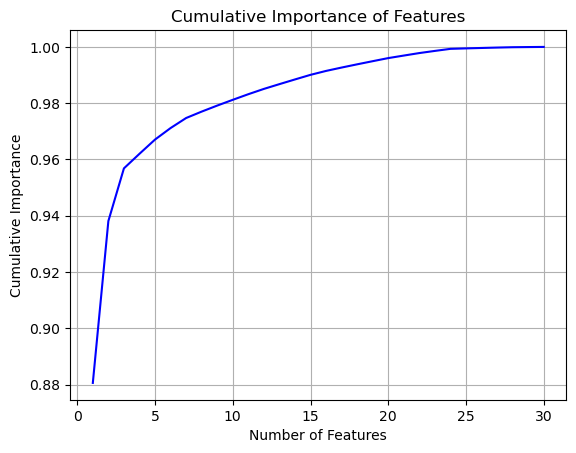

In [27]:
#check optimal number of features

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

In [28]:
#select optimal number of features

feature_importances = random_forest.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values('Importance', ascending=False)

top_features = importance_df.head(25)['Feature'].tolist()

# Update X_train and X_test to include only the top features
X_train = X_train[top_features]
X_test = X_test[top_features]

In [29]:
#checking columns of X_train
X_train.columns.tolist()

['class_Economy',
 'duration',
 'days_left',
 'airline_Vistara',
 'airline_Air_India',
 'source_city_Delhi',
 'destination_city_Delhi',
 'source_city_Mumbai',
 'destination_city_Mumbai',
 'source_city_Kolkata',
 'destination_city_Hyderabad',
 'destination_city_Kolkata',
 'arrival_time_Evening',
 'stops_two_or_more',
 'source_city_Hyderabad',
 'arrival_time_Night',
 'source_city_Chennai',
 'destination_city_Chennai',
 'departure_time_Morning',
 'departure_time_Evening',
 'departure_time_Early_Morning',
 'departure_time_Night',
 'arrival_time_Morning',
 'arrival_time_Early_Morning',
 'airline_GO_FIRST']

# Check multi-colinearity between variables to avoid model from overfitting.

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
1,duration,4.667000
2,days_left,3.970345
3,airline_Vistara,3.685397
0,class_Economy,3.482183
4,airline_Air_India,2.862558
15,arrival_time_Night,2.573085
12,arrival_time_Evening,2.396968
18,departure_time_Morning,2.240337
19,departure_time_Evening,2.190295
22,arrival_time_Morning,2.187480


All variables has VIF value less than 5. So, there is no need to drop any variable.

# Model Building

In [31]:
# import regression algorithms and metrics
import time
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
#building models of various algorithms

algorithms = [
    LinearRegression(n_jobs=-1),
    Ridge(random_state=42),
    Lasso(random_state=42),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_jobs=-1, random_state=42),
    AdaBoostRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(n_jobs=-1, random_state=42)
]

train_results = []

for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    n_train = X_train.shape[0]
    p_train = X_train.shape[1]
    adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

    end_time = time.time()  # End timer
    building_time = end_time - start_time
    
    train_results.append({
        'Model': type(algorithm).__name__,
        'MSE': mse_train,
        'RMSE': rmse_train,
        'MAE': mae_train,
        'R-squared': r2_train,
        'Adjusted R-squared': adj_r2_train,
        'Building Time (s)': building_time
    })

train_results_df = pd.DataFrame(train_results)
train_results_df = train_results_df.sort_values(by='MSE')

train_results_df

,Model,MSE,RMSE,MAE,R-squared,Adjusted R-squared,Building Time (s)
3,DecisionTreeRegressor,3.364666e+05,580.057401,54.666128,0.999349,0.999349,1.577112
4,RandomForestRegressor,1.306991e+06,1143.237195,438.776243,0.997473,0.997473,55.893306
7,XGBRegressor,1.114389e+07,3338.245850,1952.811397,0.978454,0.978452,8.481861
6,GradientBoostingRegressor,2.463682e+07,4963.549446,2973.621311,0.952367,0.952362,29.145484
5,AdaBoostRegressor,3.325279e+07,5766.523318,3650.939839,0.935709,0.935702,16.798622
0,LinearRegression,4.987848e+07,7062.469668,4473.636019,0.903565,0.903554,0.303153
1,Ridge,4.987848e+07,7062.469700,4473.597120,0.903565,0.903554,0.143571
2,Lasso,4.987884e+07,7062.495582,4471.115511,0.903565,0.903553,0.305174


In [33]:
test_results = []

for algorithm in algorithms:
    y_test_pred = algorithm.predict(X_test)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    n_test = X_test.shape[0]
    p_test = X_test.shape[1]
    adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

    test_results.append({
        'Model': type(algorithm).__name__,
        'MSE': mse_test,
        'RMSE': rmse_test,
        'MAE': mae_test,
        'R-squared': r2_test,
        'Adjusted R-squared': adj_r2_test
    })

test_results_df = pd.DataFrame(test_results)
test_results_df = test_results_df.sort_values(by='MSE')

test_results_df

,Model,MSE,RMSE,MAE,R-squared,Adjusted R-squared
6,GradientBoostingRegressor,5.086905e+07,7132.254327,4616.059841,0.901411,0.901383
4,RandomForestRegressor,5.568112e+07,7461.978274,4861.689017,0.892085,0.892055
7,XGBRegressor,5.868856e+07,7660.845934,5195.186694,0.886256,0.886224
5,AdaBoostRegressor,5.944429e+07,7710.012202,4664.736872,0.884791,0.884759
3,DecisionTreeRegressor,6.718043e+07,8196.366925,5199.291490,0.869798,0.869762
2,Lasso,1.346509e+10,116039.185771,94449.672655,-25.096595,-25.103897
1,Ridge,1.352840e+10,116311.634812,94661.261527,-25.219284,-25.226619
0,LinearRegression,1.353086e+10,116322.237044,94669.140169,-25.224064,-25.231401


The models with the lowest MSE, RMSE, and MAE on the test data are the GradientBoostingRegressor, RandomForestRegressor, and XGBRegressor. These models generally have better performance in terms of minimizing the prediction errors.

The models with higher R-squared and Adjusted R-squared values on the test data, indicating a better fit of the model to the data, are the GradientBoostingRegressor, RandomForestRegressor, and XGBRegressor.

I choose Random Forest as a final model because it is more generalized than all.

In [34]:
#building Random Forest Model

random_forest = RandomForestRegressor(n_jobs=-1, random_state=42)  

random_forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

# Hyper Parameter Tunning for Model Optimization

I choose Random Search Cv because dataset is large and I have less computational power.

In [39]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
}

In [40]:
random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,  
    scoring='neg_mean_squared_error',  
    random_state=42,
    n_jobs=-1,  
)

# Perform the hyperparameter search
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error')

In [41]:
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}
Best Score: 7501115.469269802


In [43]:
# Make predictions on the train and test data
train_predictions = random_search.best_estimator_.predict(X_train)
test_predictions = random_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics for train data
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_mae = mean_absolute_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)
train_adjusted_r2 = 1 - (1 - train_r2) * (len(X_train) - 1) / (len(X_train) - len(X_train.columns) - 1)

# Calculate evaluation metrics for test data
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)
test_adjusted_r2 = 1 - (1 - test_r2) * (len(X_test) - 1) / (len(X_test) - len(X_test.columns) - 1)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Data': ['Train', 'Test'],
    'MSE': [train_mse, test_mse],
    'RMSE': [train_rmse, test_rmse],
    'MAE': [train_mae, test_mae],
    'R-squared': [train_r2, test_r2],
    'Adjusted R-squared': [train_adjusted_r2, test_adjusted_r2]
})

results_df

,Data,MSE,RMSE,MAE,R-squared,Adjusted R-squared
0,Train,4.050828e+06,2012.666814,863.187354,0.992168,0.992167
1,Test,5.842430e+07,7643.579074,5029.848325,0.886768,0.886737


Model without hyperparameter tunning has the lowest MSE value so, I go with that.



# Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score

mse_scores = -cross_val_score(random_forest, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = mse_scores ** 0.5
mae_scores = -cross_val_score(random_forest, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
r2_scores = cross_val_score(random_forest, X_train, y_train, scoring='r2', cv=5)

I do not consider Adjusted R-squared in cross-validation because Adjusted R-squared is calculated for the entire training set, not for each validation set. Adjusted R-squared takes into account the features used in the model, and in cross-validation, the feature set remains the same across all validation sets. Therefore, it is not necessary to calculate Adjusted R-squared separately for each validation set in cross-validation.

In [45]:
# Compute mean of evaulation metrics of validation sets

mse_mean = mse_scores.mean()
rmse_mean = rmse_scores.mean()
mae_mean = mae_scores.mean()
r2_mean = r2_scores.mean()

#create a data frame of metrics

metrics = {
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)', 'R-squared'],
    'Mean': [mse_mean, rmse_mean, mae_mean, r2_mean]}

metrics_df = pd.DataFrame(metrics)
metrics_df


,Metric,Mean
0,Mean Squared Error (MSE),8.013316e+06
1,Root Mean Squared Error (RMSE),2.830572e+03
2,Mean Absolute Error (MAE),1.166637e+03
3,R-squared,9.845076e-01


MSE comes to be lower after Cross-Validation.

# Model Evaulation

In [47]:
# Make predictions on the train and test data

train_predictions = random_forest.predict(X_train)
test_predictions = random_forest.predict(X_test)

# Calculate evaluation metrics for train data
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_mae = mean_absolute_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)
train_adjusted_r2 = 1 - (1 - train_r2) * (len(X_train) - 1) / (len(X_train) - len(X_train.columns) - 1)

# Calculate evaluation metrics for test data
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)
test_adjusted_r2 = 1 - (1 - test_r2) * (len(X_test) - 1) / (len(X_test) - len(X_test.columns) - 1)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Data': ['Train', 'Test'],
    'MSE': [train_mse, test_mse],
    'RMSE': [train_rmse, test_rmse],
    'MAE': [train_mae, test_mae],
    'R-squared': [train_r2, test_r2],
    'Adjusted R-squared': [train_adjusted_r2, test_adjusted_r2]
})

results_df

,Data,MSE,RMSE,MAE,R-squared,Adjusted R-squared
0,Train,1.306991e+06,1143.237195,438.776243,0.997473,0.997473
1,Test,5.568112e+07,7461.978274,4861.689017,0.892085,0.892055


In [53]:
#important features
sorted_rankings[:5]

[('class_Economy', 0.8805878932062706),
 ('duration', 0.05753898925388011),
 ('days_left', 0.01871144519523138),
 ('airline_Vistara', 0.005179525433242301),
 ('airline_Air_India', 0.00505667203425907)]

# Save model to a file

In [48]:
import joblib


model = random_forest

# Save the model to a file
joblib.dump(model, 'Airlines_Fare_Predictor.pkl')

['Airlines_Fare_Predictor.pkl']

# Report

In model building process, I experimented with various regression algorithms and discovered that Random Forest, Gradient Boosting, and XGBoost performed well. After evaluating their performance, I chose Random Forest as it demonstrated good performance on both the train and test data, indicating that it is more generalized compared to the other algorithms.

Next, I proceeded with hyperparameter tuning to optimize the Random Forest model. However, the results of the hyperparameter tuning did not outperform the Random Forest model with its default parameters. Therefore, I decided to stick with the Random Forest model using its simple parameters.

To further assess the model's performance, I conducted cross-validation. As a result, the mean squared error (MSE) decreased, indicating improved model performance.

Finally, I evaluated the Random Forest model with simple parameters on both the train and test data to ensure its effectiveness and generalization.

## Model Summary

* Train and Test Set

|Data|	MSE|	RMSE|	MAE|	R-squared	|Adjusted R-squared|
|------|--------|--------|-----------|------------------|---------|
|	Train|	1,306,991	|1,143.245|	438.78|	0.99747|	0.99747|
|	Test|	5,568,1120|	7,461.98|	4,861.69	|0.89209|	0.89206|


* Validation Data

|Metric|	Mean|
|--------|------|
|Mean Squared Error (MSE)|	8,013,316|
|Root Mean Squared Error (RMSE)|	2,830.57|
|	Mean Absolute Error (MAE)|	1,166.64|
|	R-squared|	0.9845076|

## Top predictors
Below are the top variables that have the most significant impact on whether it will rain tomorrow or not.

|Variables	|Importance|
|---------|-------------|
|class_Economy	|0.881975|
|duration|	0.052071|
|days_left|	0.020889|

Airlines prices are primarily dependent on these factors, with 95% of the variation in prices being attributed to them. Specifically, 88% of the variation in prices can be explained by the factor of one class_economy alone.